In [2]:
F = len("Norbert")
L = len("Podgorski")

In [3]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# EXCERCISE 1

In [4]:
gen_quant = CmdStanModel(stan_file='home/code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
samples = gen_quant.sample(data={'M':10}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7],y_sim[8],y_sim[9],y_sim[10]
0,0.0,0.0,31.86960,36.0,34.0,29.0,39.0,36.0,42.0,20.0,25.0,33.0,33.0
1,0.0,0.0,44.44390,45.0,33.0,56.0,46.0,48.0,50.0,45.0,50.0,51.0,51.0
2,0.0,0.0,80.72340,77.0,78.0,69.0,78.0,85.0,79.0,77.0,80.0,72.0,85.0
3,0.0,0.0,88.17460,96.0,83.0,94.0,82.0,81.0,91.0,77.0,91.0,82.0,97.0
4,0.0,0.0,114.10000,98.0,114.0,112.0,108.0,91.0,138.0,122.0,135.0,96.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,23.99610,33.0,21.0,22.0,21.0,29.0,25.0,25.0,18.0,22.0,27.0
996,0.0,0.0,29.22790,28.0,26.0,34.0,23.0,23.0,39.0,29.0,25.0,30.0,32.0
997,0.0,0.0,177.76200,182.0,159.0,182.0,167.0,189.0,174.0,177.0,196.0,195.0,175.0
998,0.0,0.0,7.99799,7.0,4.0,4.0,19.0,9.0,15.0,7.0,8.0,1.0,10.0


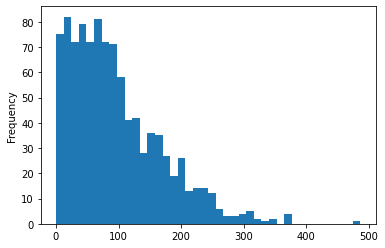

In [7]:
df['lambda'].plot.hist(bins=40)
plt.show()

/tmp/ipykernel_29109/231423322.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  y.plot.hist(subplots=True, bins=40, ax=ax)


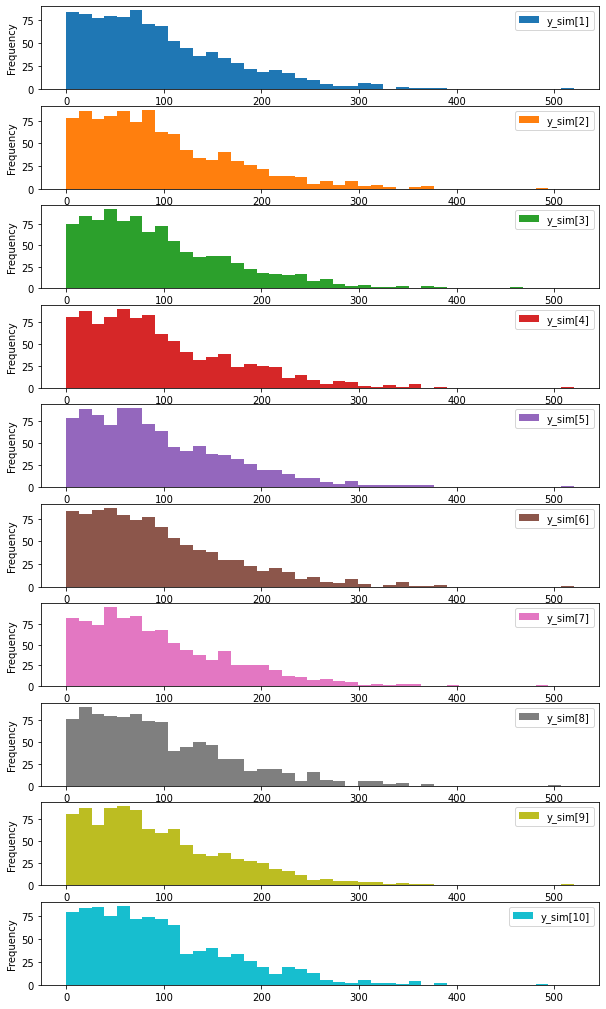

In [8]:
y = df.drop(df.columns[0:3], axis=1)
fig = plt.figure(figsize=(10,18))
ax = fig.gca()
y.plot.hist(subplots=True, bins=40, ax=ax)
plt.show()

# Excercise 2 

In [9]:
bern1 = CmdStanModel(stan_file='home/code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [10]:
bern2 = CmdStanModel(stan_file='home/code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [11]:
df = samp_bern1.draws_pd()
df_2 = samp_bern2.draws_pd()

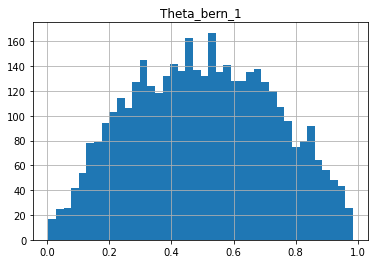

In [12]:
df['theta'].hist(bins=40)
plt.title("Theta_bern_1")
plt.show()

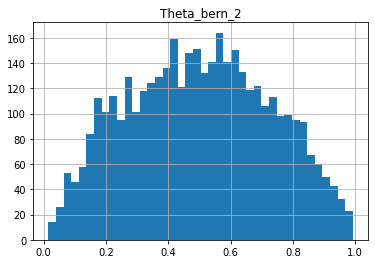

In [13]:
df_2['theta'].hist(bins=40)
plt.title("Theta_bern_2")
plt.show()

Range [0, 2] and another values of N causes errors.

# Excercise 3

In [14]:
model_gm1 = CmdStanModel(stan_file='home/code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▊      | 00:00 Iteration: 2400 / 7000 [ 34%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_4-20230318153647_1.csv, /samples/code_4-20230318153647_2.csv, /samples/code_4-20230318153647_3.csv, /samples/code_4-20230318153647_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

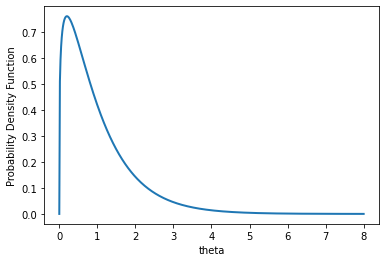

In [22]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

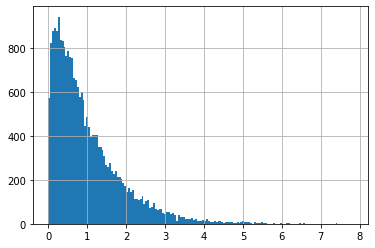

In [23]:
## add histogram of theta samples with 160 bins
df = out_gamma1.draws_pd()
df['theta'].hist(bins=160)
plt.show()

In [24]:
model_gm2 = CmdStanModel(stan_file='home/code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▋       | 00:00 Iteration: 1600 / 7000 [ 22%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_5-20230318153837_1.csv, /samples/code_5-20230318153837_2.csv, /samples/code_5-20230318153837_3.csv, /samples/code_5-20230318153837_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

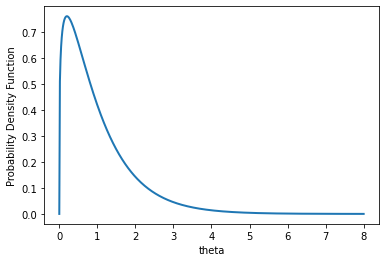

In [25]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

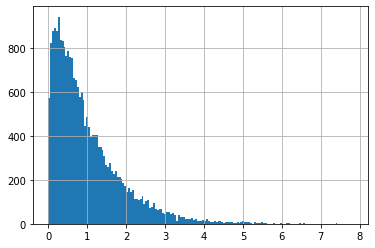

In [26]:
## add histogram of theta samples from the second model with 160 bins
df = out_gamma1.draws_pd()
df['theta'].hist(bins=160)
plt.show()

# Excercise 4

In [29]:
model_tune = CmdStanModel(stan_file='home/code_6.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [44]:
y0 = 3

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [46]:
tunes.draws_pd()

,lp__,accept_stat__,sigma
0,0.0,0.0,3.1058


# Excercise 5

In [52]:
model_samp_st = CmdStanModel(stan_file='home/code_7.stan')
model_log_target = CmdStanModel(stan_file='home/code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='home/code_9.stan')
data = {'N': F}
seed = 14102000
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


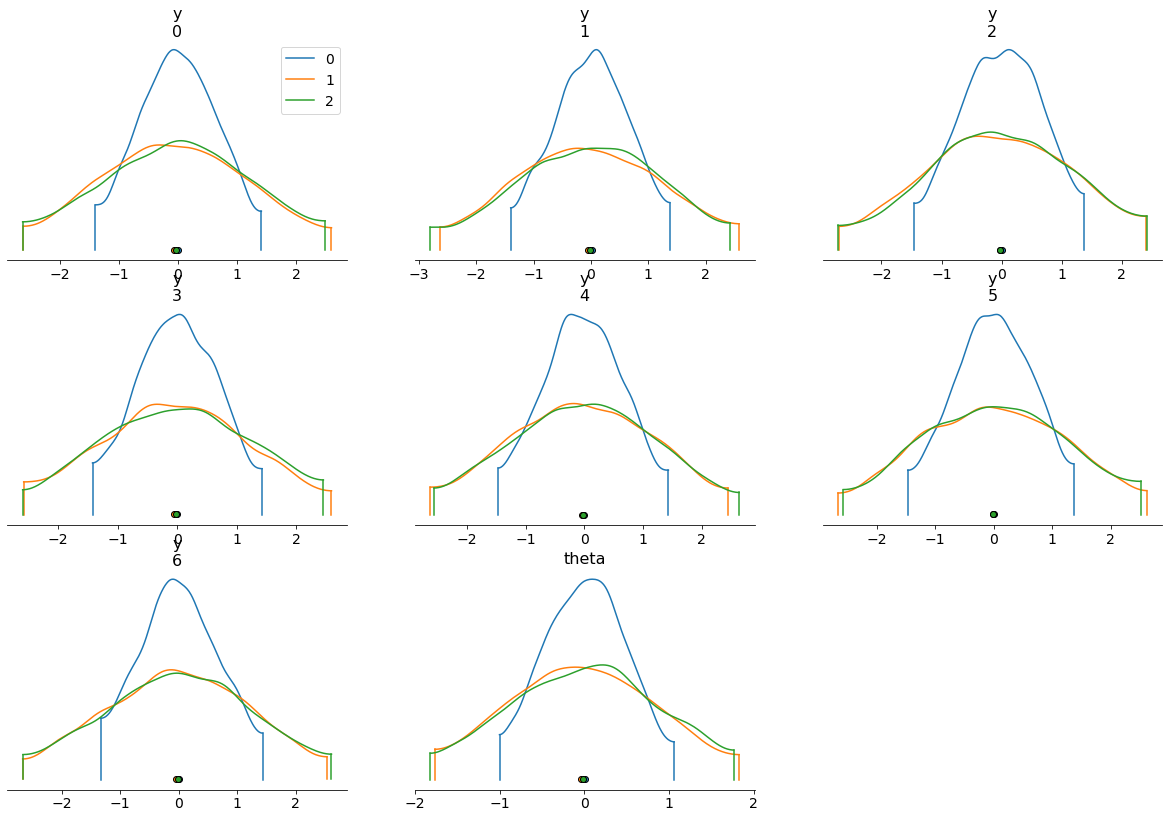

In [53]:
az.plot_density([result_1,result_2,result_3])
plt.show()

# Excercise 6

In [56]:
model_gq = CmdStanModel(stan_file='home/code_10.stan')

mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)

INFO:cmdstanpy:compiling stan file /home/code_10.stan to exe file /home/code_10
INFO:cmdstanpy:compiled model executable: /home/code_10
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/code_10.hpp /home/code_10.stan
Warning in '/home/code_10.stan', line 7, column 3: Declaration of arrays by
    placing brackets after a variable name is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          

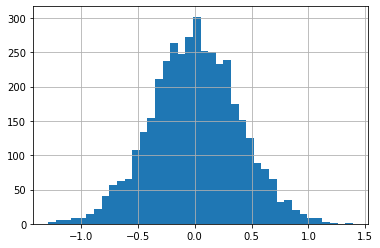

In [62]:
# investigate the output and plot histogram of mean_y variable
df = mean_of_y.draws_pd()
df['mean_y'].hist(bins=40)
plt.show()